# Dataset Flor Iris
## Importando Librerias


In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris                  #dataset sobre la flor iris (uso libre)
from sklearn.model_selection import train_test_split    #clase para dividir dataset (train y test)
from sklearn.tree import DecisionTreeClassifier         #clase que permite implementar un arbol de desición
import matplotlib.pyplot as plt                         #libreria para generar graficos

## Cargando Dataset

In [4]:
db_iris = load_iris()

## Explorando el Dataset

In [5]:
#imprimiento la descripcion del dataset
print(db_iris.DESCR)
#imprimiento datos del target
print(db_iris.target)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Convirtiendo a Dataframe

In [6]:
df_iris = pd.DataFrame(db_iris.data, columns=db_iris.feature_names)
df_iris['target'] = db_iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Diviendo los conjuntos de train y test

In [7]:
#dividiremos el dataset en  75% (train) y 25% (test), estos valores estan por defecto
X_train, X_test, Y_train, Y_test = train_test_split(df_iris[db_iris.feature_names], df_iris['target'], random_state=11)
#random_state determina el nivel de entropia de los datos, es decia la incertidumbre

## Instanciar Arbol de Decision

In [8]:
#vamos a usar un árbol de profundidad 2 (maximo dos niveles), 
#sino se define esta valor el arbol puede crecer hasta que el algoritmo encuentre una minima ramificación
tree_classifier = DecisionTreeClassifier(max_depth = 4, random_state = 0)

## Entrenar Algoritmo

In [9]:
tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Usar datos de test (25%) para predecir

In [10]:
# Predición para un registro
#tomamos la información del primer registro (X_test)
print(X_test.iloc[0])
# el verdadero resultado de la flor
print(Y_test.iloc[0])
#le pasamos esos datos al algoritmo
tree_classifier.predict(X_test.iloc[0].values.reshape(1, -1))

#Predicciones para varios (10) registros
tree_classifier.predict(X_test[0:10])

sepal length (cm)    6.8
sepal width (cm)     3.0
petal length (cm)    5.5
petal width (cm)     2.1
Name: 112, dtype: float64
2


array([2, 2, 1, 2, 2, 0, 1, 0, 0, 1])

## Calcular presicion del algoritmo

In [11]:
accuracy = tree_classifier.score(X_test, Y_test)
print(accuracy)

0.868421052631579


## Graficar el arbol

In [13]:
#para graficar  Iris-Setosa (0), - Iris-Versicolour (1), - Iris-Virginica (2)
class_names_list=list(['setosa','versicolor','virginica'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(tree_classifier,feature_names=db_iris.feature_names, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_iris.png')

True

## Mejorando el arbol

In [15]:
#la profundad de un árbol la medimos con max_depth
# creamos una lista con profundidades de 1 a 6 
max_depth_lista = list(range(1, 6))
# creamos un listado de resultados de exactitud 
accuracy = []
for depth in max_depth_lista:
    
    arbol_clasi = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    arbol_clasi.fit(X_train, Y_train)
    score = arbol_clasi.score(X_test, Y_test)
    accuracy.append(score)

## Grafico para ver resultados

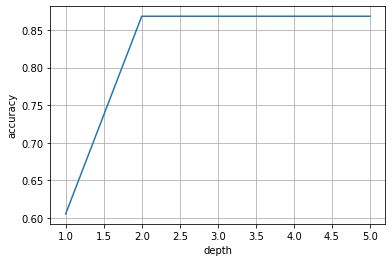

In [16]:
plt.plot(max_depth_lista,accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()

# Dataset Titanic
Importando Librerias


In [8]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split    #clase para dividir dataset (train y test)
from sklearn.tree import DecisionTreeClassifier         #clase que permite implementar un arbol de desición
from sklearn.metrics import accuracy_score              #clase para generar la exactitud del modelo (accuracy)
from sklearn.impute import SimpleImputer                #The SimpleImputer class provides basic strategies for imputing missing values.
import matplotlib.pyplot as plt                         #libreria para generar graficos
import seaborn as sns

## Importando los datos desde el de load_titanic

El cvs fue tomado de: https://www.kaggle.com/c/titanic/data

In [10]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/dataset_titanic.csv")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Conociendo los datos

In [11]:
print(df_titanic.info())
df_titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Cinco Filas

In [12]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Evaluando datos nulos

In [13]:
df_titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Imputando Datos

In [15]:
def Imputar_Datos(columnas):
  edad=columnas[0]
  sobrevivientes=columnas[1]
  if pd.isnull(edad):
    if sobrevivientes==0:
      return df_titanic[df_titanic['Survived']==0]['Age'].mean()
    elif sobrevivientes==1:
      return df_titanic[df_titanic['Survived']==1]['Age'].mean()
  else:
    return edad

## Aplicando la Funcion

In [16]:
df_titanic['Age'] = df_titanic[['Age','Survived']].apply(Imputar_Datos,axis=1)

Nuevamente evaluando Nulos

In [17]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Graficando 

0    0.616162
1    0.383838
Name: Survived, dtype: float64


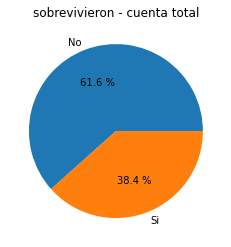

In [18]:
#mostrando datos, con porcentajes
datos=df_titanic.Survived.value_counts(normalize = True)
print(datos)
plt.pie(datos, labels=["No","Si"], autopct="%0.1f %%")
plt.title("sobrevivieron - cuenta total")
plt.show()

## Texto a numericos

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_titanic['Sex'] = le.fit_transform(df_titanic['Sex'])

Info

In [20]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


## Instanciar Arbol

In [23]:
arbol = DecisionTreeClassifier()

## Separamos datos


In [39]:
X = df_titanic[['Pclass','Sex', 'Age']]
y = df_titanic['Survived']
#cambiamos la proporción de 70%-train y 30%-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

## Entrenando el algoritmo

In [40]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Realizamos Prediccion

In [41]:
y_train_pred = arbol.predict(X_train)
# Predecimos sobre nuestro set de test
y_test_pred = arbol.predict(X_test)
# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))
accuary_global = arbol.score(X_test, y_test)

#Cuando el error de entrenamiento es mayor al del test es porque hay overfitting

Accuracy sobre conjunto de Train: 0.9250936329588015
Accuracy sobre conjunto de Test: 0.8487394957983193


## Graficando el arbol

In [ ]:
#para graficar  male (0), - female (1)
class_names_list=list(['male', 'female'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(arbol,feature_names=['Pclass','Sex'], class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('arbol_titanic.png')